## Import Librairies

In [1]:
import numpy as np
from tensorflow.keras.models import load_model

import random
import matplotlib.pyplot as plt

## Load and Test Model

Chargment du model


Séléction de 10 photos aléatoire dans le dataset test
Prédire les classes des images sélectionnées
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


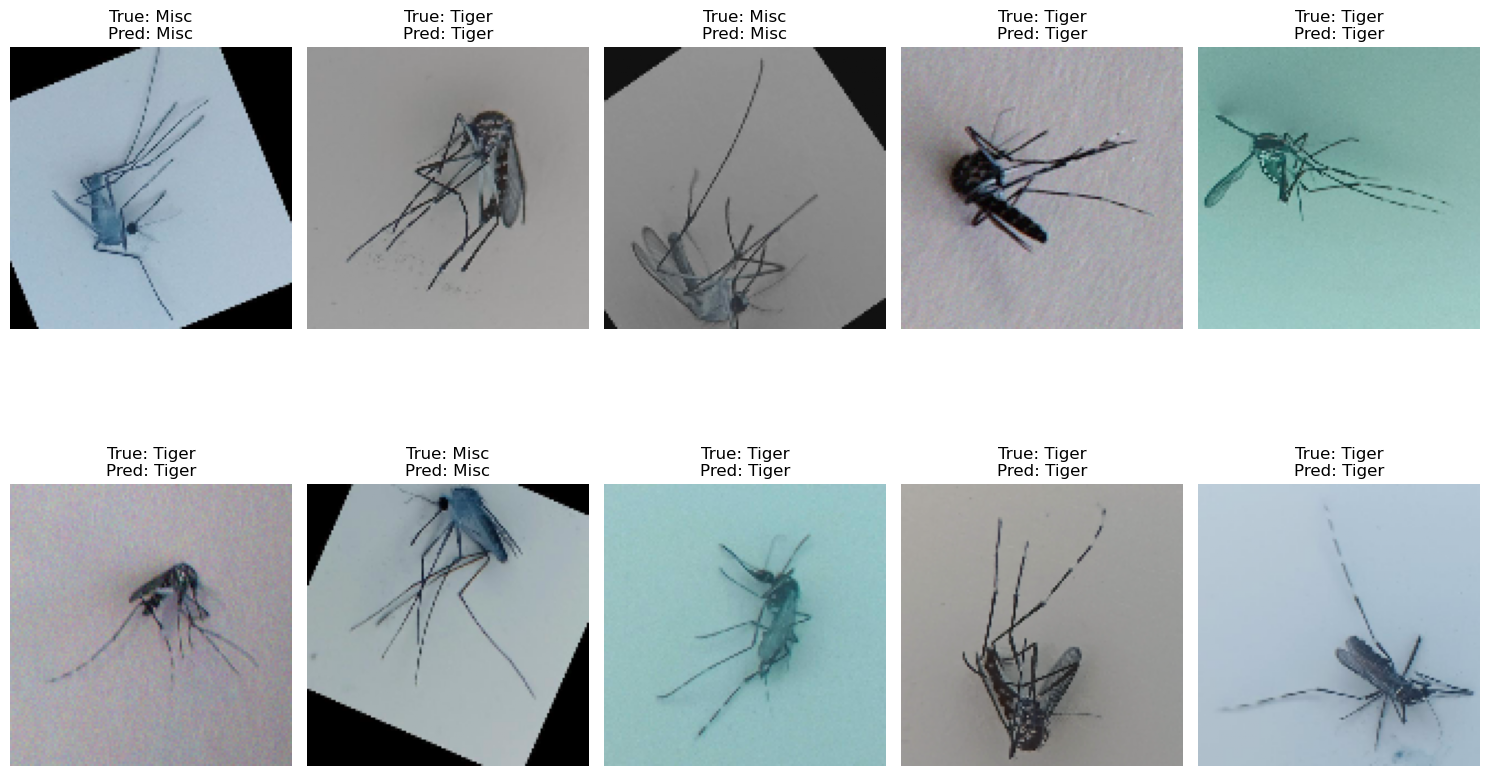

In [2]:
# Charger les données de test sauvegardées
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Charger le modèle
print("Chargment du model")
model = load_model("insect_recognition_cnn_model.h5")

# Sélectionner 10 indices aléatoires
print("Séléction de 10 photos aléatoire dans le dataset test")
random_indices = random.sample(range(X_test.shape[0]), 10)
selected_images = X_test[random_indices]
selected_labels = y_test[random_indices]

# Prédire les classes des images sélectionnées
print("Prédire les classes des images sélectionnées")
predictions = model.predict(selected_images)
predicted_labels = (predictions > 0.5).astype(int)

# Afficher les images avec leurs étiquettes vraies et prédites
plt.figure(figsize=(15, 10))
for i, img in enumerate(selected_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    true_label = "Tiger" if selected_labels[i] == 1 else "Misc"
    predicted_label = "Tiger" if predicted_labels[i] == 1 else "Misc"
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


## Load from Azure

Modèle téléchargé avec succès à : modele.h5
Modèle Keras chargé avec succès
Séléction de 10 photos aléatoire dans le dataset test
Prédire les classes des images sélectionnées
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


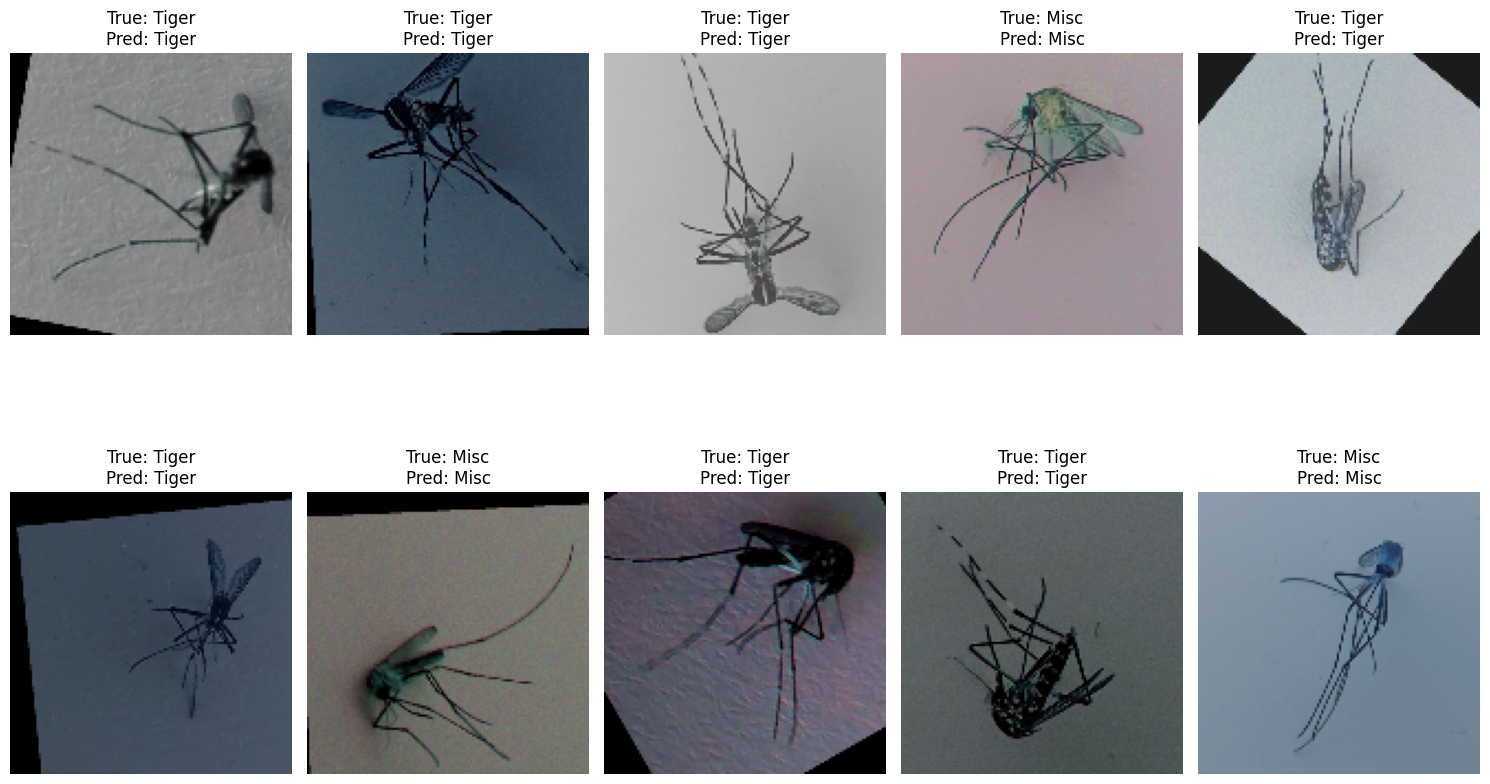

In [7]:
from azure.storage.blob import BlobServiceClient
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import random
 
 
# Configuration Azure
AZURE_STORAGE_CONNECTION_STRING = "DefaultEndpointsProtocol=https;AccountName=moustiquedataset;AccountKey=LLF99KD+ad2HBruQPcOrTNc+biQo31iUGdg69RwEy1C+/hEWid0vw65ZLfqRWh4YWKPR7lsd8hL4+ASteuKMHw==;EndpointSuffix=core.windows.net"
CONTAINER_NAME = "modele"
BLOB_NAME = "improved_insect_recognition_model_1.h5"
LOCAL_MODEL_PATH = "modele.h5"
 
def download_keras_model_from_blob():
    """
    Télécharge un modèle Keras (.h5) depuis Azure Blob Storage.
    """
    # Connexion au service Blob
    blob_service_client = BlobServiceClient.from_connection_string(AZURE_STORAGE_CONNECTION_STRING)
    container_client = blob_service_client.get_container_client(CONTAINER_NAME)
    # Télécharger le fichier
    blob_client = container_client.get_blob_client(BLOB_NAME)
    with open(LOCAL_MODEL_PATH, "wb") as file:
        file.write(blob_client.download_blob().readall())
    print(f"Modèle téléchargé avec succès à : {LOCAL_MODEL_PATH}")
 
# Étape 1 : Télécharger le modèle
download_keras_model_from_blob()
 
# Étape 2 : Charger le modèle Keras
model = tf.keras.models.load_model(LOCAL_MODEL_PATH)
print("Modèle Keras chargé avec succès")
 
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
 
# Sélectionner 10 indices aléatoires
print("Séléction de 10 photos aléatoire dans le dataset test")
random_indices = random.sample(range(X_test.shape[0]), 10)
selected_images = X_test[random_indices]
selected_labels = y_test[random_indices]
 
# Prédire les classes des images sélectionnées
print("Prédire les classes des images sélectionnées")
predictions = model.predict(selected_images)
predicted_labels = (predictions > 0.5).astype(int)
 
# Afficher les images avec leurs étiquettes vraies et prédites
plt.figure(figsize=(15, 10))
for i, img in enumerate(selected_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    true_label = "Tiger" if selected_labels[i] == 1 else "Misc"
    predicted_label = "Tiger" if predicted_labels[i] == 1 else "Misc"
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

## Approche futur : seuil de tolérance 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

# Charger les données de test sauvegardées
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Charger le modèle
print("Chargement du modèle...")
model = load_model("insect_recognition_cnn_model.h5")

# Prédire sur l'ensemble des données de test
print("Prédiction sur l'ensemble des données de test...")
predictions = model.predict(X_test)

# Évaluer les performances pour plusieurs seuils
thresholds = [0.05, 0.1, 0.3, 0.5, 0.7, 0.9]
for threshold in thresholds:
    print(f"\nÉvaluation des performances avec un seuil de {threshold}:")
    predicted_labels = (predictions > threshold).astype(int)
    
    # Générer le rapport de classification
    print("Classification Report:")
    print(classification_report(y_test, predicted_labels, target_names=["Misc", "Tiger"]))
    
    # Générer la matrice de confusion
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predicted_labels))


Chargement du modèle...


Prédiction sur l'ensemble des données de test...
115/115 ━━━━━━━━━━━━━━━━━━━━ 16s 137ms/step

Évaluation des performances avec un seuil de 0.05:
Classification Report:
              precision    recall  f1-score   support

        Misc       1.00      0.95      0.97      1882
       Tiger       0.95      1.00      0.97      1768

    accuracy                           0.97      3650
   macro avg       0.97      0.97      0.97      3650
weighted avg       0.97      0.97      0.97      3650

Confusion Matrix:
[[1795   87]
 [   8 1760]]

Évaluation des performances avec un seuil de 0.1:
Classification Report:
              precision    recall  f1-score   support

        Misc       0.99      0.97      0.98      1882
       Tiger       0.97      0.99      0.98      1768

    accuracy                           0.98      3650
   macro avg       0.98      0.98      0.98      3650
weighted avg       0.98      0.98      0.98      3650

Confusion Matrix:
[[1821   61]
 [  10 1758]]

Évaluation de